
# Airsim.Client 
> Connects to the Airsim simulator and enables higher level procedures



In [ ]:
#| default_exp airsim.test_client

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
# skip_showdoc: true to avoid running cells when rendering docs, and skip_exec: true to skip this notebook when running tests. 
# this should be a raw cell 

In [ ]:
#| export
from mavcom.airsim_python_client import MultirotorClient
import mavcom.params as params
from mavcom.utils import config_dir
import logging
from mavcom.airsim.client import AirSimClient

In [ ]:
#| export
logging.basicConfig(format='%(asctime)-8s,%(msecs)-3d %(levelname)5s [%(filename)10s:%(lineno)3d] %(message)s',
                    datefmt='%H:%M:%S',
                    level=params.LOGGING_LEVEL)
logger = logging.getLogger(params.LOGGING_NAME)

In [ ]:
#| hide
from fastcore.utils import *
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
%%capture
from mavcom.utils.display import *
from mavcom.utils.sim_linux import *
from matplotlib import pyplot as plt

In [ ]:
show_doc(RunSim)

---

### RunSim

>      RunSim (name:str='Coastline', resx:int=1600, resy:int=1200,
>              windowed:str|None='windowed',
>              settings:str|pathlib.Path|None=None)

Run the Airsim simulator

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| name | str | Coastline | name of the simulator environment |
| resx | int | 1600 | window size  x |
| resy | int | 1200 | window size  y |
| windowed | str \| None | windowed | windowed or fullscreen |
| settings | str \| Path \| None | None | settings file |

In [ ]:
rs = RunSim("AirSimNH", settings=config_dir() / "airsim_settings_high_res.json")

INFO |30.895| mavcom.RunSim      | sim_linux.: 75 | MainThread | MainProces | Settings file /home/john/PycharmProjects/UAV/config/airsim_settings_high_res.json found.


Starting Airsim  ['/home/john/Airsim/AirSimNH/LinuxNoEditor/AirSimNH/Binaries/Linux/AirSimNH', '-ResX=1600', '-ResY=1200', '-windowed', '-settings=/home/john/PycharmProjects/UAV/config/airsim_settings_high_res.json']
Started Airsim AirSimNH


In [ ]:
#|eval: false
show_doc(AirSimClient)

---

### AirSimClient

>      AirSimClient (ip='', port:int=41451, timeout_value=3600)

Multirotor Client for the Airsim simulator with higher level procedures

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| ip | str |  | rpc connection address |
| port | int | 41451 | rpc connection port |
| timeout_value | int | 3600 | timeout for client ping in seconds |

In [ ]:
#|eval: false
show_doc(AirSimClient.place_object)

---

### AirSimClient.place_object

>      AirSimClient.place_object (name:str, x:float, y:float, z:float,
>                                 scale:float=1.0, physics_enabled:bool=False)

Place an object in the simulator
First check to see if the asset it is based on exists

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| name | str |  | asset name |
| x | float |  | position x |
| y | float |  | position y |
| z | float |  | position z |
| scale | float | 1.0 | scale |
| physics_enabled | bool | False | physics enabled |

In [ ]:
asc = AirSimClient()

Connected!
Client Ver:1 (Min Req: 1), Server Ver:1 (Min Req: 1)


In [ ]:
asc.place_object("Sofa_02", 5.0, 0.0, -1.0, scale=0.5 )

The sofa can be seen at the location with `rs.client.simGetObjectPose("Sofa_02")`
The sofa can be moved with `rs.move_asset(x,y,z,asset_name)`

In [ ]:
asc.simGetObjectPose("Sofa_02")

<Pose> {   'orientation': <Quaternionr> {   'w_val': nan,
    'x_val': nan,
    'y_val': nan,
    'z_val': nan},
    'position': <Vector3r> {   'x_val': nan,
    'y_val': nan,
    'z_val': nan}}

In [ ]:
#### Get image from one camera

In [ ]:
#|eval: false
show_doc(AirSimClient.get_image)

---

### AirSimClient.get_image

>      AirSimClient.get_image (camera_name:str='0', rgb2bgr:bool=False)

Get an image from cameras `camera_name`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| camera_name | str | 0 | cameras name |
| rgb2bgr | bool | False | convert to bgr |
| **Returns** | **ndarray** |  | **image** |

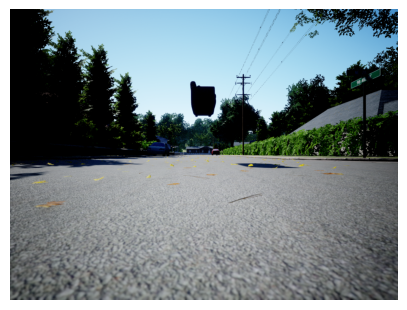

In [ ]:
img = asc.get_image(rgb2bgr=True)
ax = show_image(img)

In [ ]:
#|eval: false
show_doc(AirSimClient.get_images)

---

### AirSimClient.get_images

>      AirSimClient.get_images (camera_names:list=['0'], rgb2bgr:bool=False)

Get images from the simulator of cameras `camera_names`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| camera_names | list | ['0'] | cameras names |
| rgb2bgr | bool | False | convert to rgb |
| **Returns** | **list** |  | **images** |

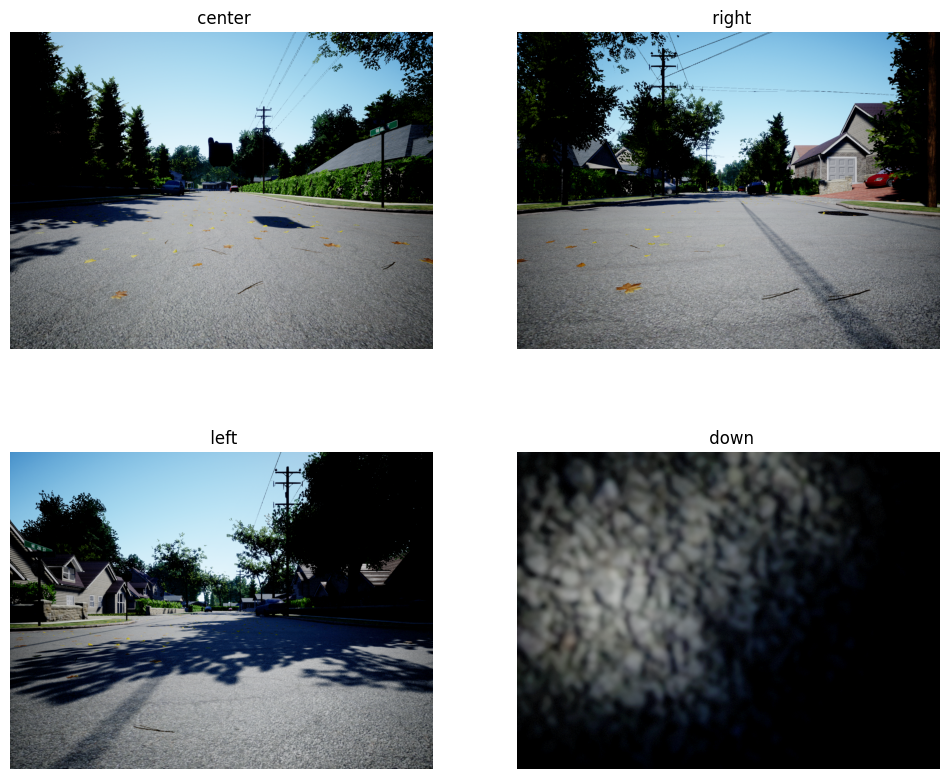

In [ ]:

cams = ["center", "right", "left", "down"]
imgs = asc.get_images(cams, rgb2bgr=True)

_,axs = plt.subplots(2,2,figsize=(12,10))
for i,ax in enumerate(axs.flatten()): show_image(imgs[i], ax=ax, title=f' {cams[i]}')

In [ ]:
rs.exit()

Airsim exited with rc = 143


In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()